## Objetivos 
1) Saber o valor total da folha salarial.
2) Qual foi o faturamento da empresa?
3) Qual % de funcionários já fechou algum contrato.
4) Calcular o total de contratos que cada área da empresa fechou.
5) Calcular o total de funcionários por área.
6) Calcular o Ticket médio mensal dos contratos.

### Importação de Módulos e arquivos 

In [10]:
# usando o Pandas para fazer a análise
import pandas as pd
# Todos os dataframes receberam o sulfixo '_df'
# Os aqruivos utlizados tinham como separador o ; e o decimal era marcado por ,
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep = ';', decimal=',')
BaseServiçosPrestados_df = pd.read_excel('BaseServiçosPrestados.xlsx')

# excluindo colunas que não serão úteis para a análise
# neste caso será a coluna de estado civil do dataframe de funcionários

funcionarios_df = funcionarios_df.drop(['Estado Civil'],axis=1)

display(funcionarios_df)
display(clientes_df)
display(BaseServiçosPrestados_df)




,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


#### Respondendo a pergunta sobre a folha salarial

In [15]:
# Criaremos uma coluna com o salário total de cada funcionário = salário base + imposto + benefícios + VT + VR
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR'] 
print('O Total da Folha salarial foi de R${:,}'.format(sum(funcionarios_df['Salario Total'])))


O Total da Folha salarial foi de R$2,717,493.22


#### Calculando o Faturamento Total

In [21]:
# para isso vamos criar uma tabela auxiliar combinando os valores, úteis para essa análise, das tabelas de serviços e clientes 
# fazemos nessa ordem a junção dos df por termos valores únicos na nossa BasBaseServiçosPrestados_df
# E depois multiplicamos os valores de tempo total de contrato e valor do contrato
faturamentos_df = BaseServiçosPrestados_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']], on = 'ID Cliente')
faturamentos_df['Faturamento Total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']

print('O faturamento total foi de R${:,}'.format(sum(faturamentos_df['Faturamento Total'])))

O faturamento total foi de R$5,519,160


#### Calculando a % dos funcionários que fecharam contrato

In [23]:
# temos que contar os funcionários que fecharam contrato e a quantidade total de funcionários
# temos que tratar as duplicatas de funcionários também usando a função .unique()

qtde_funcionarios_total = len(funcionarios_df['ID Funcionário'])
qtde_funcionarios_qfecharamcontrato = len(BaseServiçosPrestados_df['ID Funcionário'].unique())

print('O porcentagem de funcionários que fecharam contratos foi de {:.2%}'.format(qtde_funcionarios_qfecharamcontrato/qtde_funcionarios_total))

O porcentagem de funcionários que fecharam contratos foi de 86.84%


#### Quantidade de contratos por área

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

<Axes: >

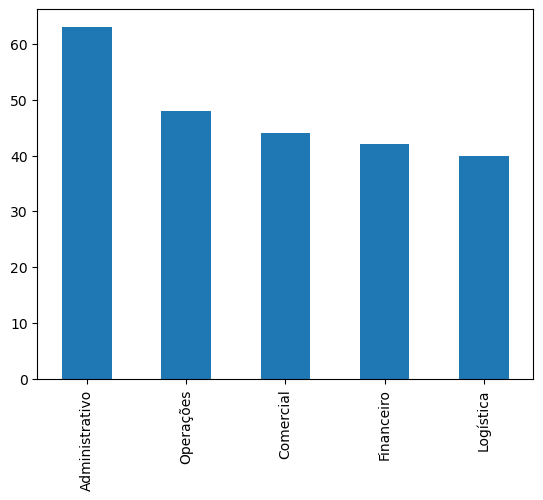

In [33]:
# vamos criar um df juntando as informações de serviçoes prestados para termos a quantidade de funcionários que prestaram serviçoes e o df de funcionários 

contratos_area_df = BaseServiçosPrestados_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário','Area']], on = 'ID Funcionário')
contratos_area_qtde = contratos_area_df['Area'].value_counts()
# vamos criar um simples gráfico de barras também, para melhorar a visualização
display(contratos_area_qtde)
contratos_area_qtde.plot(kind = 'bar')

#### Quantos Funcionários por área 

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


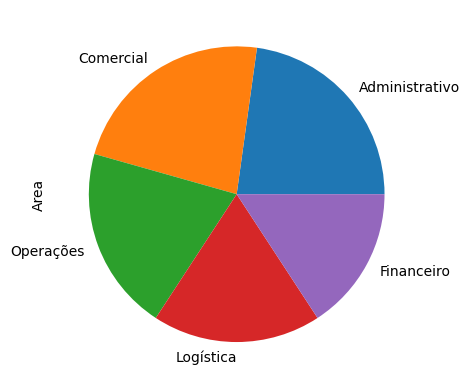

In [31]:
# bem simples, só executar um value.counts() na coluna de área
# vamos criar um simples gráfico de pizza também, para melhorar a visualização
funcionarios_area = funcionarios_df['Area'].value_counts()
funcionarios_area.plot(kind = 'pie')
print(funcionarios_area)

#### Ticket Médio Mensal

In [35]:
# Para calcular o Ticket Médio mensal iremos fazer a média da coluna de valor de contrato mensal 
ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
print('O Ticket Médio mensal foi de : R${:,.2f}'.format(ticket_medio))

O Ticket Médio mensal foi de : R$2,502.56
